In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Secondhand Car price Prediction.csv")

In [4]:
X=df[['on road old', 'years', 'km', 'rating','condition', 'economy', 'hp', 'torque']]
y=df[ 'current price']

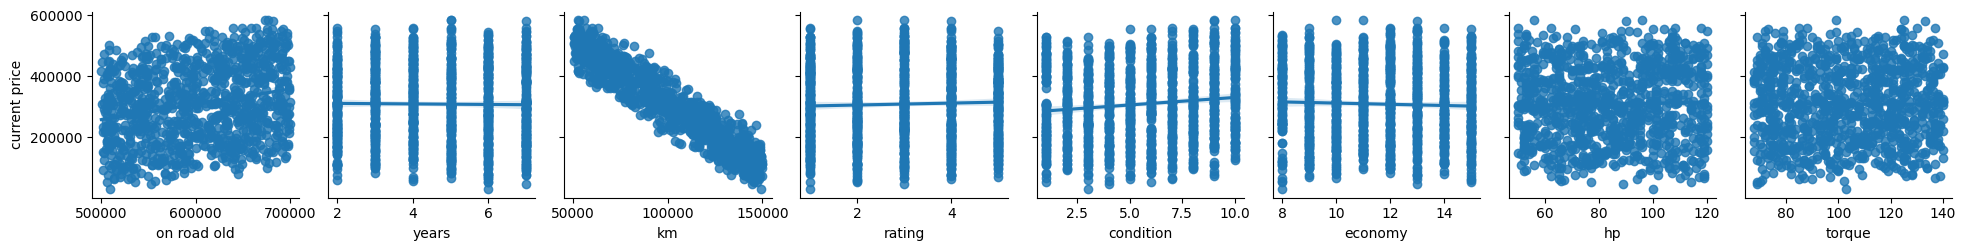

In [5]:
sns.pairplot(data=df,x_vars=['on road old', 'years', 'km', 'rating','condition', 'economy', 'hp', 'torque'],y_vars='current price',kind='reg')

<AxesSubplot: >

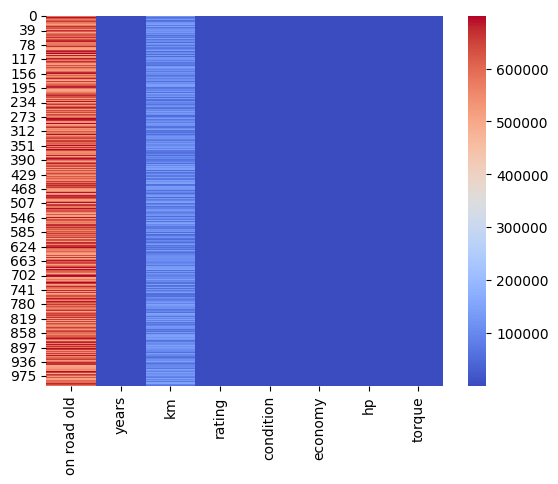

In [6]:
sns.heatmap(X,cmap='coolwarm')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [9]:
reg.intercept_

385013.83455910254

In [10]:
reg.coef_

array([ 5.11070839e-01, -1.94847242e+03, -4.03066368e+00,  8.73137071e+02,
        4.48846838e+03, -2.64512391e+02,  4.44344691e+00,  3.67575552e+01])

In [11]:
y_pred=reg.predict(X_test)
y_pred

array([266856.87682337, 148765.48337964, 207265.96366025, 172073.4505194 ,
       133873.71501029, 326800.70003932, 287452.78979583,  98773.53501915,
       236374.58169558, 244377.63798102, 450541.29879052, 259350.93167518,
       486063.1541423 , 369576.44260546, 437928.79600859, 190401.19483412,
       358907.22149771, 283485.52300857, 251566.63058112, 459083.51550677,
       245211.37220356, 419486.38544401, 218981.73527951, 522484.14365611,
       484728.1344493 , 327882.86617765, 338483.88204494, 307085.75472888,
       159271.0611232 , 491776.90303996, 483671.81047446, 454916.94520868,
       431234.59079289, 459635.30577188, 408337.39990257,  98545.9716866 ,
       236973.00172169, 148974.91083421, 300214.31223956, 109061.27210285,
       397439.43668526, 410062.60511534, 159347.63707633, 463720.59794085,
       446955.75910979, 311797.15053361, 387844.08362172, 446342.63049936,
       451597.2536371 , 459723.13784395, 155690.57343538, 311821.11757634,
       167113.48744457, 3

In [12]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

25029.46117830582

In [13]:
metrics.mean_squared_error(y_test,y_pred)

846662490.5241934

In [14]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred) )

29097.465362539628

In [15]:
reg.score(X_test,y_test )*100

94.82748767640312

In [16]:
f"{reg.score(X_test,y_test )*100} %"

'94.82748767640312 %'